<a href="https://colab.research.google.com/github/doha18j/breast-cancer-Detection/blob/main/Breast_cancer_detection_(cancerous_non_cancerous)project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

In [21]:
# Load the breast cancer dataset
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [22]:
# Convert it to DataFrame
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns=breast_cancer_dataset.feature_names)
data_frame['label'] = breast_cancer_dataset.target

In [23]:
# Display dataset information
data_frame.info()
print("\nLabel Distribution:\n", data_frame['label'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [24]:
# Split features and labels
X = data_frame.drop(columns='label', axis=1)
Y = data_frame['label']

In [25]:
# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [26]:
# Standardize the data
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [27]:
# Define the Neural Network model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(X_train_std, Y_train, validation_split=0.1, epochs=50, callbacks=[early_stopping])

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.3390 - loss: 0.9264 - val_accuracy: 0.4130 - val_loss: 0.7670
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5658 - loss: 0.6817 - val_accuracy: 0.7826 - val_loss: 0.5695
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8159 - loss: 0.5282 - val_accuracy: 0.8696 - val_loss: 0.4388
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8870 - loss: 0.4264 - val_accuracy: 0.9348 - val_loss: 0.3522
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9090 - loss: 0.3493 - val_accuracy: 0.9565 - val_loss: 0.2941
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9264 - loss: 0.3068 - val_accuracy: 0.9565 - val_loss: 0.2528
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9439 - loss: 0.2645 - val_accuracy: 0.9565 - val_loss: 0.2222
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9661 - loss: 0.2228 - val_accuracy: 0.9565 - val_los

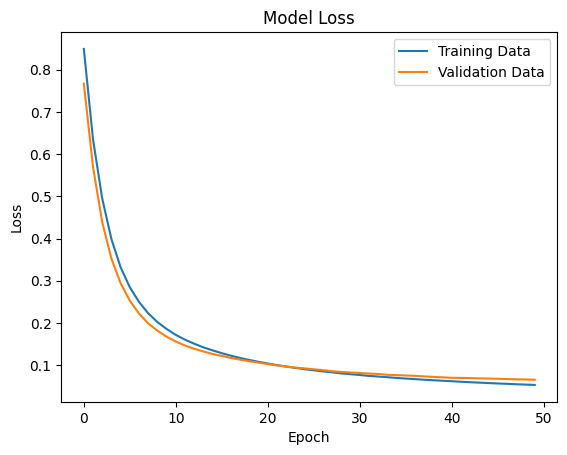

In [30]:
# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Data', 'Validation Data'], loc='upper right')
plt.show()

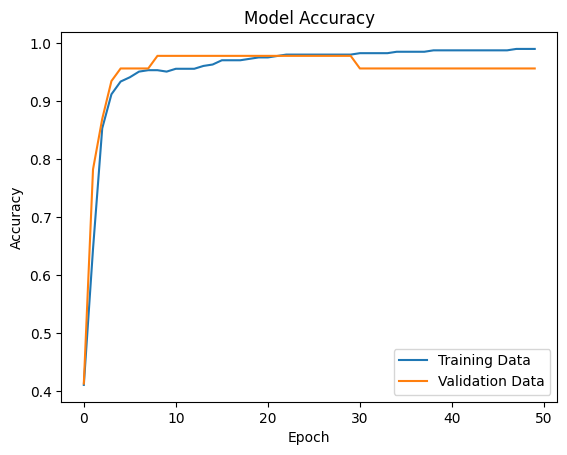

In [31]:
# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Data', 'Validation Data'], loc='lower right')
plt.show()

In [32]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_std, Y_test)
print("Test Accuracy:", accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9714 - loss: 0.0829 
Test Accuracy: 0.9649122953414917


In [33]:
# Save the model
model.save("breast_cancer_modeld77.keras")

In [34]:
# Save test data
pd.DataFrame(X_test).to_csv("X_test.csv", index=False)
pd.DataFrame(Y_test).to_csv("Y_test.csv", index=False)

In [35]:
# Model Prediction
Y_pred_prob = model.predict(X_test_std)
Y_pred_labels = (Y_pred_prob > 0.5).astype(int)  # Thresholding sigmoid output


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [36]:
# Evaluation Metrics
print("Accuracy Score:", accuracy_score(Y_test, Y_pred_labels))
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred_labels))
print("Classification Report:")
print(classification_report(Y_test, Y_pred_labels))

Accuracy Score: 0.9649122807017544
Confusion Matrix:
[[43  2]
 [ 2 67]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        45
           1       0.97      0.97      0.97        69

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [37]:
# Testing the model with a new sample input
test_input = np.asarray([11.76,21.6,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,0.4062,1.21,2.635,28.47,0.005857,0.009758,0.01168,0.007445,0.02406,0.001769,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563])

# Scaling the input
test_input_std = scaler.transform(test_input.reshape(1, -1))

# Making a prediction
prediction = model.predict(test_input_std)

# Extracting scalar value and determining the label
prediction_value = prediction[0, 0]  # Extract the single probability value
prediction_label = 'Benign' if prediction_value > 0.5 else 'Malignant'
print(prediction_value)
print(f'The tumor is {prediction_label}')


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
0.9987302
The tumor is Benign
